In [1]:
from functools import reduce
from itertools import cycle
from operator import mul
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%load_ext autoreload
%autoreload 2
from util import split_agents, compute_pairwise_distance

In [2]:
import dpilqr
import util

#### 3-D trajectory of regular ADMM

In [3]:
import matplotlib.font_manager

In [49]:
trajectory_data = np.load("ADMM_BVC_convex_4.npz")

In [50]:
trajectory_data

NpzFile 'ADMM_BVC_convex_4.npz' with keys: X_full, obj_trj, obj_hist, xr

In [53]:
X_full = trajectory_data['X_full']
xr = trajectory_data['xr']
obj_trj = trajectory_data['obj_trj']
obj_hist = trajectory_data['obj_hist']

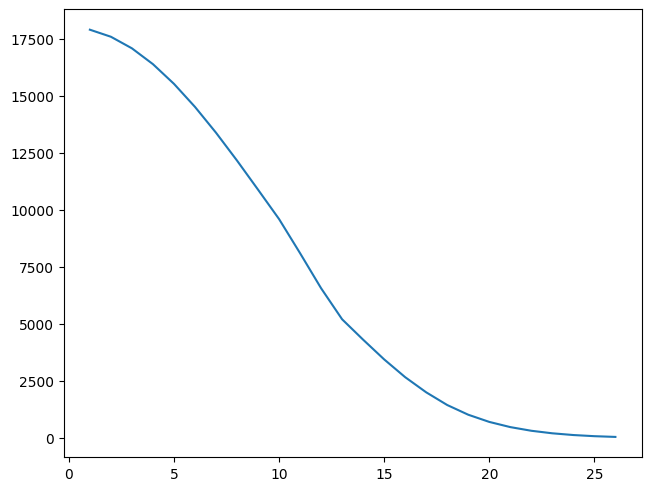

In [55]:
plt.plot(obj_hist)

In [56]:
X_full[-1]

array([-9.541e-17, -1.401e+00,  1.189e+00,  1.344e-16, -2.744e-01,
        5.954e-05, -1.401e+00, -5.967e-17,  1.189e+00, -2.744e-01,
        1.031e-16,  5.954e-05,  1.401e+00, -6.157e-18,  1.189e+00,
        2.744e-01,  2.680e-17,  5.954e-05, -7.255e-18,  1.401e+00,
        1.189e+00, -6.444e-18,  2.744e-01,  5.954e-05])

In [57]:
xr.T

array([[ 0. , -1.5,  1.2,  0. ,  0. ,  0. , -1.5,  0. ,  1.2,  0. ,  0. ,
         0. ,  1.5,  0. ,  1.2,  0. ,  0. ,  0. ,  0. ,  1.5,  1.2,  0. ,
         0. ,  0. ]])

In [59]:
dpilqr.distance_to_goal(X_full[-1].flatten(), xr.flatten(), 4, 6, 3)

array([0.099, 0.099, 0.099, 0.099])

In [60]:
obj_trj

array(2072.628)

In [63]:
x_dims = [6,6,6,6]

/home/randychen233/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


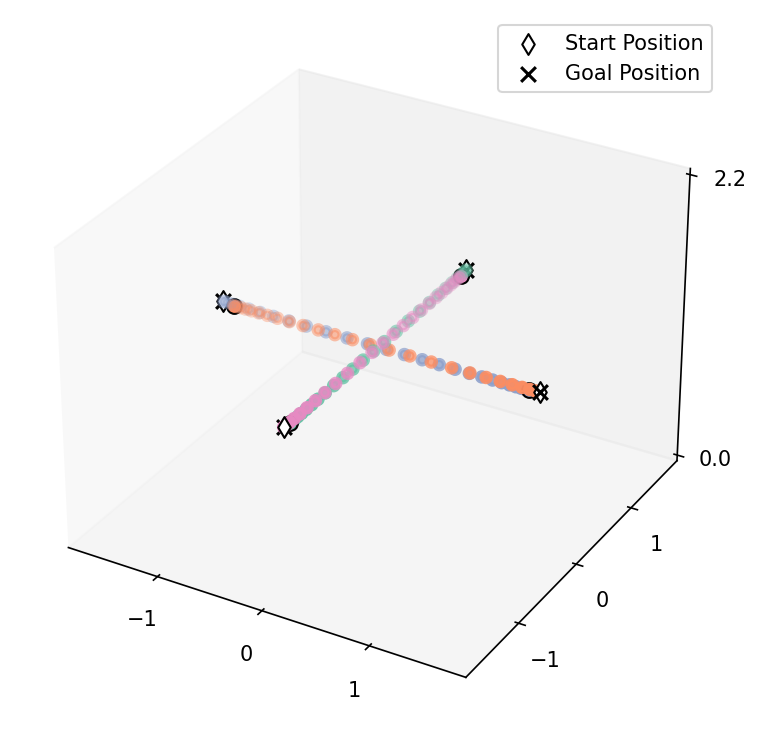

In [64]:
plt.figure(dpi=150)
dpilqr.plot_solve(X_full, float(obj_trj), xr, x_dims, True, 3)
plt.savefig('figures/BVC_5_drones', bbox_inches='tight', dpi=300)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"])
plt.gca().set_xticks([-1,0,1])
plt.gca().set_yticks([-1,0,1])
plt.gca().set_zticks([0,2.2])
plt.gca().grid('')
plt.title("");
# plt.show()

In [46]:
compute_pairwise_distance(X_full,x_dims).min(),compute_pairwise_distance(X_full,x_dims).max()

(0.6083636174225908, 2.7670545721713427)

In [47]:
compute_pairwise_distance(X_full,x_dims).shape

(19, 10)

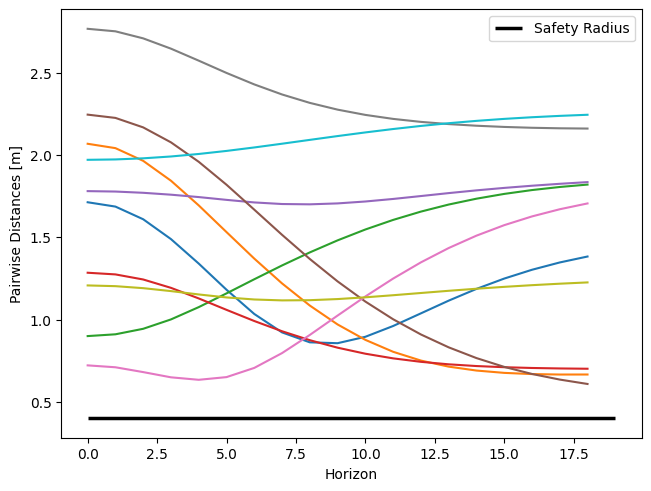

In [48]:
plt.figure(dpi=100)
plt.plot(compute_pairwise_distance(X_full,x_dims))
plt.hlines(0.4, 0, X_full.shape[0] ,color='k',linewidth=2.5,label='Safety Radius')
plt.ylabel('Pairwise Distances [m]')
plt.xlabel('Horizon')
plt.legend()